In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

In [2]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')

In [3]:
df['CDR'].fillna(0, inplace=True)
labels = df['CDR']!=0

In [4]:
tra = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_tra_90.gif'):
            tra.append(plt.imread(path1+img))
tra = np.array(tra).astype(np.float64)/255

In [14]:
tra1 = tra.reshape(436,208*176)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tra1, labels.astype(int), test_size=0.25, random_state = 42)

In [19]:
#model = SVC()
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy:  0.81
recall:  0.52
precision:  0.55


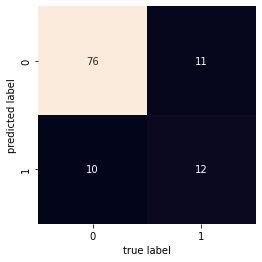

In [20]:
# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred).round(2))
print('recall: ' , recall_score(y_test, y_pred).round(2))
print('precision: ' , precision_score(y_test, y_pred).round(2))